In [1]:
import os
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from model import Vocaburary
from utils import clean_str, remove_stopwords, nomalize_Adj
import dgl.sparse as dglsp
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure

c:\Users\Wen2Tee5\Desktop\Postgraduate\final\finalEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dics = {
    "R52" : '.\\R52PreprocessData\\',
    "20NG" : '.\\ProcessedData\\20NG\\',
    "MR" : '.\\ProcessedData\\mr\\',
    "Ohsumed" : '.\\ProcessedData\\ohsumed_single_23\\',
    "R8" : '.\\ProcessedData\\R8\\',
    }

In [3]:
dataset = next(iter(root_dics.keys()))
root = root_dics[dataset]
train_path = os.path.join(root, "train_data.csv")
test_path = os.path.join(root, "test_data.csv")

In [4]:
df = pd.concat([pd.read_csv(train_path), pd.read_csv(test_path)], ignore_index=True)

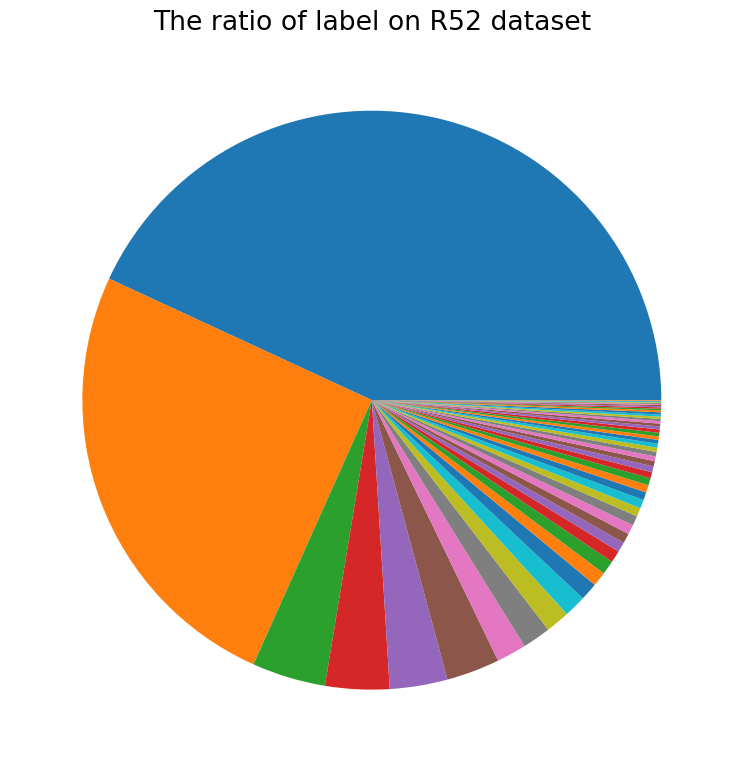

In [5]:
fig : Figure= plt.figure(figsize=(8., 8.))
plt.rcParams.update({
    "font.size" : 16
})

plt.pie(df['target'].value_counts())
plt.title(f"The ratio of label on R52 dataset")
fig.tight_layout()
plt.show()
fig.savefig("./result/R52_Label_Ratio.svg", transparent=True, format='svg')

In [6]:
root_dics.pop('R52')

'.\\R52PreprocessData\\'

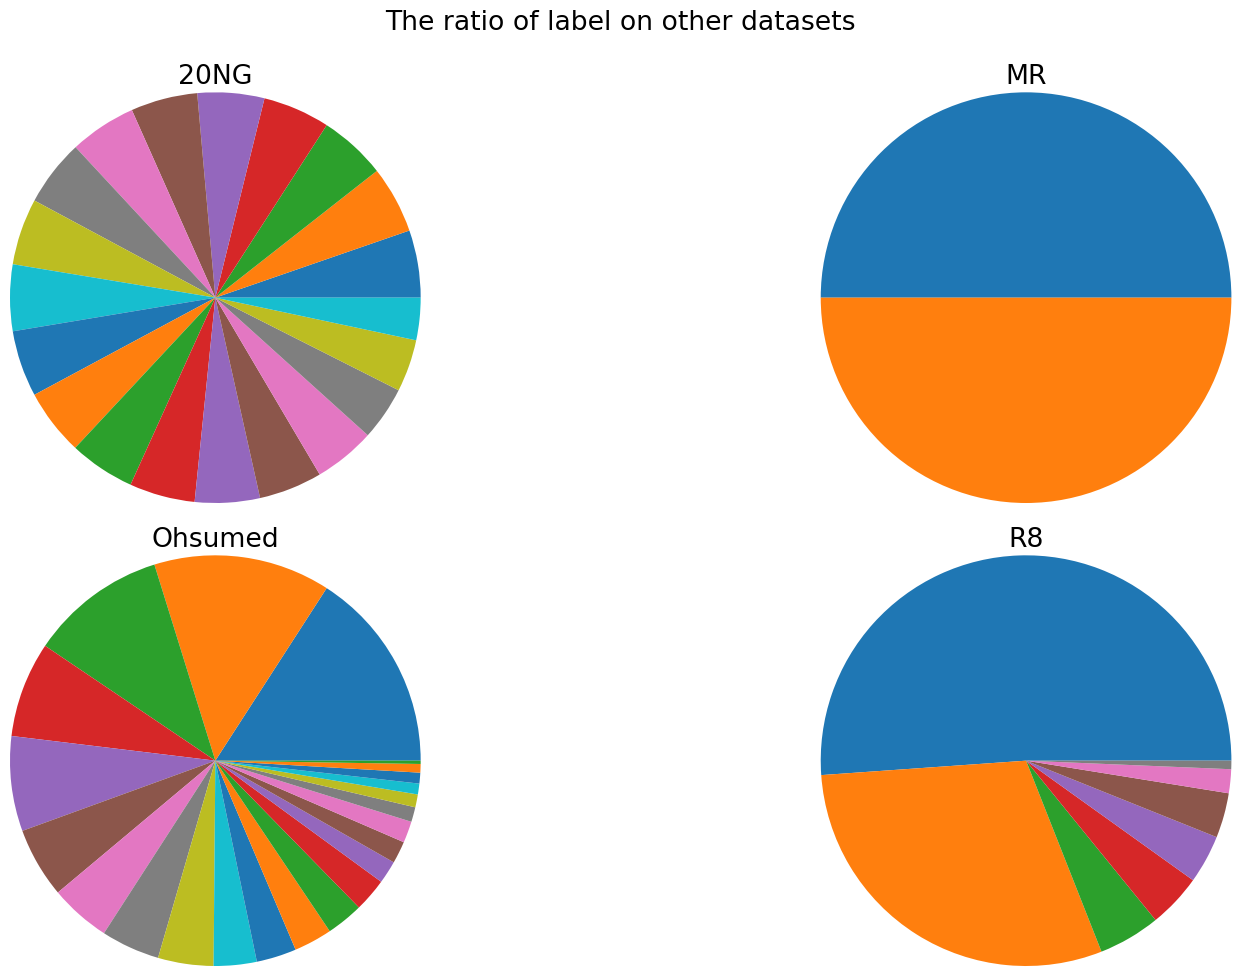

In [9]:

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig : Figure 
axes : np.ndarray[Axes]
datasets = list(root_dics.keys())
for i, ax in enumerate(axes.flat):
    ax : Axes
    if i >= 5:
        ax.set_visible(False)
        continue
    dataset = datasets[i]
    root = root_dics[dataset]
    train_path = os.path.join(root, "train_data.csv")
    test_path = os.path.join(root, "test_data.csv")
    df = pd.concat([pd.read_csv(train_path), pd.read_csv(test_path)], ignore_index=True)
    ax.pie(df['target'].value_counts(), radius=1.25)
    ax.set_title(dataset)
fig.suptitle("The ratio of label on other datasets")
fig.tight_layout()
fig.set_alpha(0.)
fig.savefig('./result/Dataset_Label_Ratio.svg', transparent=True)
plt.show()